# Introduction

In this notebook, we have tried to build some **Recommendation Systems** to get some Anime Recommendations. We will be building three Recommendation Systems and applying them on Dataset given **[here](https://www.kaggle.com/CooperUnion/anime-recommendations-database)**. The Dataset contains two files namely : **anime.csv** and **rating.csv**.

First, we will start with a very basic system based on **Demographic Filtering**. Then, we will perform **Content Based Filtering** to get some good recommendations. Finally, we will take up **Collaborative Filtering** to get some very good recommendations. 

# Importing Libraries and Getting the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel


In [2]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv")

In [3]:
pd.set_option('display.max_columns',100)
np.set_printoptions(suppress = True)

Let us take a look at both the files in Dataset to get an understanding of given dataset.

In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


So, we can see `anime` Dataset contains following attributes:
* `anime_id` : ID given to each Anime
* `name` : Name of the Anime
* `genre` : List of Genres relating to given anime
* `type` : Type of Anime i.e whether it is a Movie, TV show etc.
* `episodes` : Number of Episodes produced for a anime
* `rating` : Average Rating given to the Anime
* `members` : Number of people that have watched the Anime

In [5]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Now, let us look at the `rating` Dataset which contains following features:
* `user_id` : ID given to each User
* `anime_id` : Same as in anime file
* `rating` : Rating given by user to a particular Anime.

So, let us build the Recommendation Systems above mentioned.

# Building Recommendation Systems:
## Demographic Filtering

Demographic Filtering is a vey basic method to get recommendations. It uses weighted rating as a feature to list top recommendations. It simply checks the average ratings for each anime and the number of people that have rated the show. It does not take into considerations different tastes of different users.

In [6]:
m = anime["members"].quantile(q = 0.9)

In [7]:
new_anime = anime[anime["members"] >= m]
c = new_anime["rating"].mean()

We will define a function `weighted_rating` which is based on the IMDB's model.

In [8]:
def weighted_rating(x, m = m, c = c):
    v = x["members"]
    r = x["rating"]
    return (v/(v+m) * r) + (m/(m+v) * c)

In [9]:
new_anime['wr'] = new_anime.apply(weighted_rating, axis=1)

<ipython-input-9-ba6e3f41c96a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_anime['wr'] = new_anime.apply(weighted_rating, axis=1)


In [10]:
new_anime.head()

,anime_id,name,genre,type,episodes,rating,members,wr
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.056864
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.174164
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,8.801260
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.075481
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,8.816486


In [11]:
new_anime = new_anime.sort_values('wr', ascending = False)

So, we sorted the animes according to the weighted rating. Now, let us take a look at top 10 recommendations given by Demographic Filtering.

In [12]:
new_anime.head(n = 10)

,anime_id,name,genre,type,episodes,rating,members,wr
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.174164
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.075481
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.056864
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,8.989611
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,8.934554
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,8.883975
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,8.877348
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254,8.818371
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,8.816486
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,8.801260


Let us take a look at the given results visually.

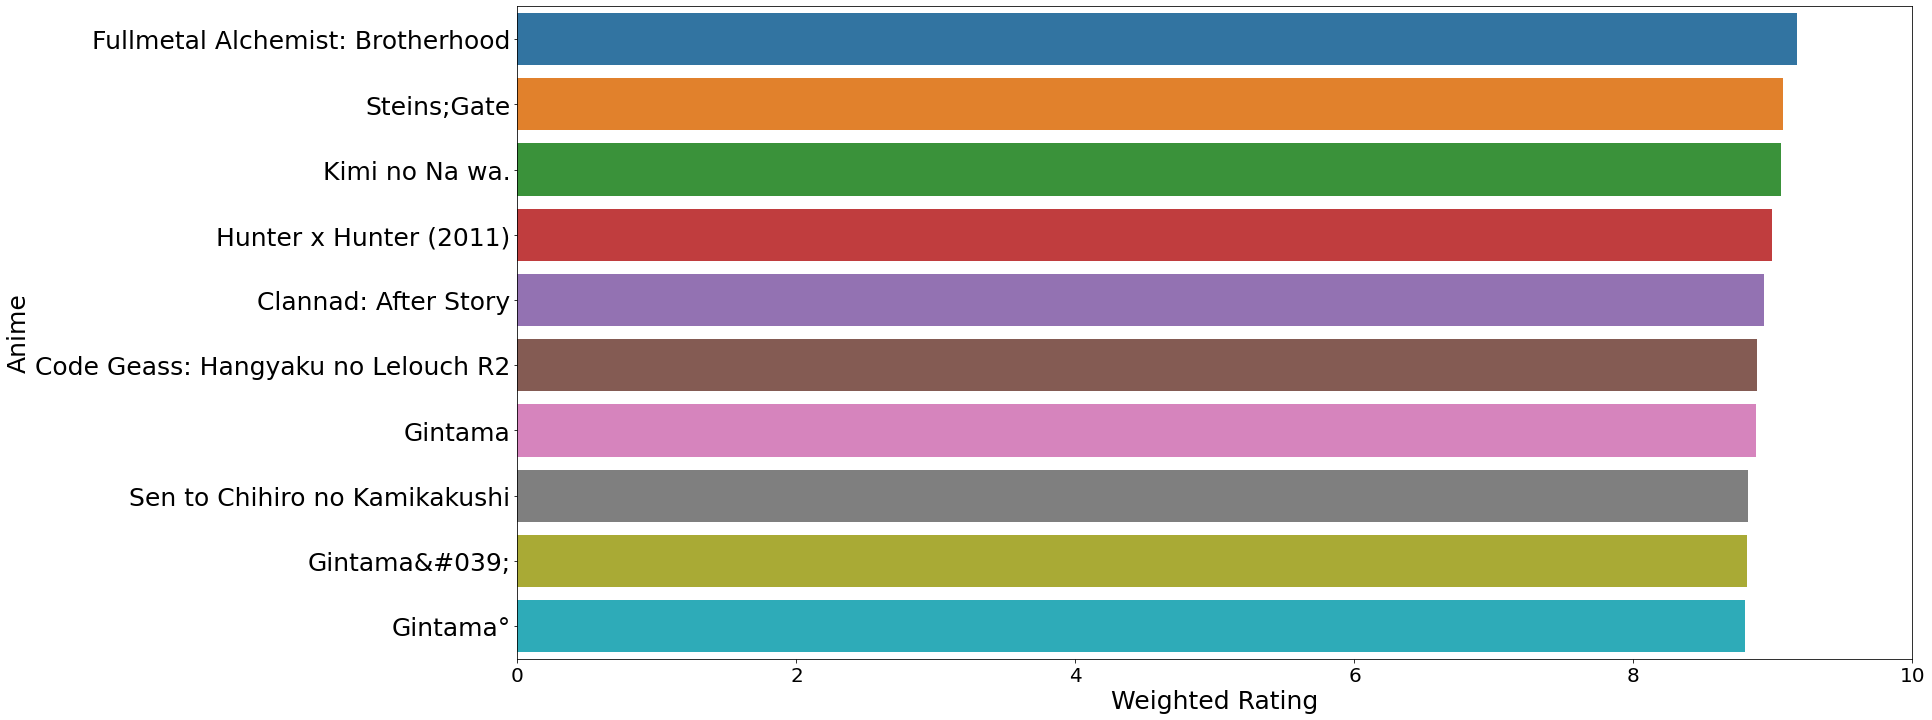

In [13]:
plt.figure(figsize = (25, 12))
sns.barplot(x = "wr", y = "name", data = new_anime.head(n = 10))
plt.xlim(0,10) 
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.xlabel("Weighted Rating", size = 25)
plt.ylabel("Anime", size = 25)
plt.show()

So, we see that overall "Fullmetal Alchemist: Brotherhood" is the best recommendation according to this model to any user.

Now, let us take a step further and make a bit more complex but a useful model to get recommendations.
## Content Based Filtering

Content Based Filtering is a method to get recommendations that are based on the input anime name by the user. It tries to get anime that are similar to input anime by comparing the genres of the animes. 

First, we need to fill genres of the animes with empty genre list.

In [14]:
anime.genre.fillna('none', inplace = True)
a = anime.genre.apply(lambda x: x.split(", "))

Now, let us take a look at the different genres present in the Dataset along with their value counts.

In [15]:
b = []
for i in a:
    for j in i:
        b.append(j)
print(pd.Series(b).value_counts())

Comedy           4645
Action           2845
Adventure        2348
Fantasy          2309
Sci-Fi           2070
Drama            2016
Shounen          1712
Kids             1609
Romance          1464
School           1220
Slice of Life    1220
Hentai           1141
Supernatural     1037
Mecha             944
Music             860
Historical        806
Magic             778
Ecchi             637
Shoujo            603
Seinen            547
Sports            543
Mystery           495
Super Power       465
Military          426
Parody            408
Space             381
Horror            369
Harem             317
Demons            294
Martial Arts      265
Dementia          240
Psychological     229
Police            197
Game              181
Samurai           148
Vampire           102
Thriller           87
Cars               72
Shounen Ai         65
none               62
Shoujo Ai          55
Josei              54
Yuri               42
Yaoi               39
dtype: int64


In [16]:
b = list(enumerate(pd.Series(b).value_counts()))
print(b)

[(0, 4645), (1, 2845), (2, 2348), (3, 2309), (4, 2070), (5, 2016), (6, 1712), (7, 1609), (8, 1464), (9, 1220), (10, 1220), (11, 1141), (12, 1037), (13, 944), (14, 860), (15, 806), (16, 778), (17, 637), (18, 603), (19, 547), (20, 543), (21, 495), (22, 465), (23, 426), (24, 408), (25, 381), (26, 369), (27, 317), (28, 294), (29, 265), (30, 240), (31, 229), (32, 197), (33, 181), (34, 148), (35, 102), (36, 87), (37, 72), (38, 65), (39, 62), (40, 55), (41, 54), (42, 42), (43, 39)]


We can see looking at the above value counts that we can get good results using 25 most common genres.

Now, we will use two methods to get Sparse matrix . Sparse matrix is basically a two dimensional matrix with genres as columns and animes as rows.

First, we will use `CountVectorizer` and then we will use `TfidfVectorizer`, and then compare them to see which gives better results.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 25)
X = cv.fit_transform(anime.genre).toarray()

In [18]:
cos_simi_1 = linear_kernel(X, X)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 25)
Y = tfidf.fit_transform(anime.genre).toarray()

In [20]:
cos_simi_2 = linear_kernel(Y, Y)

So, now we have Cosine Similarities for each method which gives us the idea of similarity between any two animes.

In [21]:
indices = pd.Series(anime.index, index = anime['name'])

Now, we will build a function that takes in Anime name and the Cosine Similarity build by two methods above mentioned. It will give recommendations based on that.

In [22]:
def recommendation(name, cos_simi):
    idx = indices[name]
    simi_scores = list(enumerate(cos_simi[idx]))
    simi_scores = sorted(simi_scores, key = lambda x: x[1], reverse = True)
    simi_scores = simi_scores[1:11]
    print(simi_scores)
    index = [i[0] for i in simi_scores]
    return anime.iloc[index]

So, let us get recommendations using `CountVectorizer` method.

In [23]:
recommendation("One Piece", cos_simi_1)

[(143, 6.0), (163, 6.0), (200, 6.0), (212, 6.0), (231, 6.0), (241, 6.0), (896, 6.0), (960, 6.0), (1558, 6.0), (2472, 6.0)]


,anime_id,name,genre,type,episodes,rating,members
143,4155,One Piece Film: Strong World,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.42,85020
163,12859,One Piece Film: Z,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.39,76051
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
212,31490,One Piece Film: Gold,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.32,18642
231,19123,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,8.29,17247
241,15323,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,8.27,24707
896,31289,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,7.78,11922
960,33338,One Piece: Heart of Gold,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,7.75,17443
1558,9135,Fullmetal Alchemist: The Sacred Star of Milos,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",Movie,1,7.50,87944
2472,1132,Digimon Frontier,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,50,7.25,74929


Now, we will get the recommendations for same Anime using `tfidfVectorizer` method.

In [24]:
recommendation("One Piece", cos_simi_2)

[(143, 0.9999999999999999), (163, 0.9999999999999999), (212, 0.9999999999999999), (231, 0.9999999999999999), (241, 0.9999999999999999), (896, 0.9999999999999999), (960, 0.9999999999999999), (2472, 0.9999999999999999), (1991, 0.9508961124719292), (1159, 0.92233752530152)]


,anime_id,name,genre,type,episodes,rating,members
143,4155,One Piece Film: Strong World,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.42,85020
163,12859,One Piece Film: Z,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.39,76051
212,31490,One Piece Film: Gold,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Movie,1,8.32,18642
231,19123,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,8.29,17247
241,15323,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,8.27,24707
896,31289,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,7.78,11922
960,33338,One Piece: Heart of Gold,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,7.75,17443
2472,1132,Digimon Frontier,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,50,7.25,74929
1991,807,Tsubasa Chronicle: Tori Kago no Kuni no Himegimi,"Action, Adventure, Drama, Fantasy, Shounen",Movie,1,7.39,33633
1159,874,Digimon Tamers,"Adventure, Comedy, Drama, Fantasy, Shounen",TV,51,7.65,94391


We can clearly see that `TfidfVectorizer` gives better recommendations than `CountVectorizer` method.

Now, we will build the final model which will give very good recommendations as compared to already built models.

## Collaborative Filtering

*Collaborative filtering* is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

Collaborative Filtering is of two types:
* **User - User Collaborative Filtering**
* **Item - Item Collaborative Filtering**

User - User Collaborative Filtering looks for similarity between the users based on their rating behaviour gives recommendations based on that whereas Item - Item Collaborative Filtering looks for similarity between the items based on the ratings given by target user and gives recommendations based on that.

We will be using Item - Item Collaborative Filtering and will create a model that gives us recommendations on the basis of the list of anime names and their corresponding ratings given as input.

First, Let us look at the Ratings Data in order to perform *Collaborative Filtering*.

In [25]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


So, we have `user_id`, `anime_id` and `rating` given to us.

We need to convert the DataFrame into a  form that is easy to be worked upon and is intuitive.

In [26]:
user_ratings = rating.pivot_table(index = ['user_id'], columns = ['anime_id'], values = 'rating')

In [27]:
type(user_ratings)

pandas.core.frame.DataFrame

Let us look at the new form:

In [28]:
user_ratings.head()

anime_id,1,5,6,7,8,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,...,33866,33868,33869,33870,33871,33872,33884,33885,33902,33905,33906,33907,33908,33909,33910,33911,33912,33914,33915,33934,33964,33978,33979,33998,33999,34000,34015,34036,34048,34078,34085,34103,34107,34119,34136,34173,34238,34239,34240,34252,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,8.0,NaN,NaN,6.0,NaN,6.0,6.0,NaN,6.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So, we have `user_id` along the rows, `anime_id` as columns and `rating` as values.

Note: None value is assigned if no rating was given by a particular user for a given anime. 

In [31]:
user_ratings = user_ratings.fillna(0)

We have filled the `NaN` with "0", in order to proceed towards getting **similarity matrix**.

In [32]:
user_ratings.head()

anime_id,1,5,6,7,8,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,...,33866,33868,33869,33870,33871,33872,33884,33885,33902,33905,33906,33907,33908,33909,33910,33911,33912,33914,33915,33934,33964,33978,33979,33998,33999,34000,34015,34036,34048,34078,34085,34103,34107,34119,34136,34173,34238,34239,34240,34252,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,6.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Also, "-1" rating is assigned if a user has seen an anime but not rated it. We will assign it "0" value also.

In [33]:
user_ratings.mask((user_ratings == -1), 0, inplace=True)

In [34]:
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73515 entries, 1 to 73516
Columns: 11200 entries, 1 to 34519
dtypes: float64(11200)
memory usage: 6.1 GB


In [35]:
user_ratings.head()

anime_id,1,5,6,7,8,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,...,33866,33868,33869,33870,33871,33872,33884,33885,33902,33905,33906,33907,33908,33909,33910,33911,33912,33914,33915,33934,33964,33978,33979,33998,33999,34000,34015,34036,34048,34078,34085,34103,34107,34119,34136,34173,34238,34239,34240,34252,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,6.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So, we have prepared the `user_ratings` in order to get the **Item - Item Similarity Matrix** using **Pearson's Correlation**.

**Pearsons Correlation Coefficient:**
![alt text](https://cdn1.byjus.com/wp-content/uploads/2019/06/word-image28.png "Pearson's Correlation Coefficient")

In [36]:
item_similarity_df = user_ratings.corr(method = 'pearson') #One time run only.

We have `item_similarity_df` which gives us correlation between any two animes. Let us take a look at its values.

In [37]:
item_similarity_df.head()

anime_id,1,5,6,7,8,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,...,33866,33868,33869,33870,33871,33872,33884,33885,33902,33905,33906,33907,33908,33909,33910,33911,33912,33914,33915,33934,33964,33978,33979,33998,33999,34000,34015,34036,34048,34078,34085,34103,34107,34119,34136,34173,34238,34239,34240,34252,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
anime_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.563115,0.454366,0.207583,0.049794,0.083441,0.170881,0.040055,0.123068,0.233125,0.093320,0.066249,0.023473,0.163740,0.185222,0.178472,0.187180,0.089080,0.061647,0.385483,0.225435,0.317909,0.307071,0.375455,0.257234,0.246179,0.145033,0.381120,0.197719,0.124524,0.143632,0.088963,0.089245,0.102610,0.194799,0.083858,0.069283,0.216954,0.174332,0.163873,0.170455,0.075484,0.054386,0.091291,0.096221,0.084321,0.232223,0.174607,0.120011,0.023991,...,0.008911,0.008911,0.008911,0.008911,-0.001726,0.008911,NaN,0.008911,0.006874,0.005081,0.008911,0.008911,0.008911,0.012551,0.012525,0.012472,0.010258,0.008911,0.008911,0.021079,0.019294,NaN,0.005495,NaN,NaN,NaN,0.007360,0.002297,0.010346,NaN,0.033442,0.021276,0.008294,0.003105,0.006784,NaN,0.008200,-0.001726,0.046540,-0.001726,0.010233,0.000876,0.005581,0.012455,NaN,0.006397,NaN,0.009600,NaN,NaN
5,0.563115,1.000000,0.350892,0.215262,0.044157,0.049155,0.150473,0.027579,0.104582,0.183265,0.050902,0.038594,0.033865,0.139774,0.159046,0.173971,0.173225,0.070542,0.070651,0.296760,0.239152,0.297056,0.238320,0.366511,0.250516,0.193169,0.184344,0.360170,0.171948,0.143205,0.127093,0.108566,0.094979,0.089506,0.234126,0.082420,0.073384,0.186769,0.156105,0.143608,0.160126,0.069362,0.044777,0.075817,0.092898,0.086056,0.216148,0.164166,0.092624,0.020585,...,0.013385,0.013385,0.013385,0.013385,-0.001067,0.013385,NaN,0.013385,0.011907,0.008710,0.013385,0.013385,0.013385,0.018852,0.018814,0.016084,0.017336,0.013385,0.013385,0.024036,0.025322,NaN,0.008355,NaN,NaN,NaN,0.008317,-0.002112,0.016658,NaN,0.042000,0.018273,0.009223,0.005971,-0.001067,NaN,0.017295,0.011779,0.038222,-0.001067,0.015008,0.006383,0.010170,0.015134,NaN,0.011185,NaN,0.004273,NaN,NaN
6,0.454366,0.350892,1.000000,0.232371,0.079266,0.124031,0.150290,0.063692,0.143490,0.190011,0.132542,0.108995,0.031574,0.185562,0.230404,0.165361,0.261120,0.107704,0.057606,0.296511,0.184010,0.224492,0.295277,0.271497,0.252598,0.291999,0.168150,0.286462,0.214844,0.119771,0.166483,0.105945,0.108032,0.133254,0.185791,0.096195,0.085268,0.209827,0.211551,0.194204,0.215114,0.129734,0.083423,0.138543,0.116056,0.096125,0.204092,0.192069,0.176680,0.047175,...,0.008983,0.008983,0.008983,0.008983,0.006389,0.008983,NaN,0.008983,0.008573,0.010870,0.008983,0.008983,0.008983,0.004680,0.004523,0.014418,0.012042,0.008983,0.008983,0.018700,0.023430,NaN,0.003157,NaN,NaN,NaN,0.003910,-0.002758,0.012704,NaN,0.019951,0.018060,0.005457,0.008988,0.010280,NaN,0.011948,-0.001394,0.019044,-0.001394,0.012055,0.013967,-0.001223,0.016836,NaN,0.007862,NaN,0.005933,NaN,NaN
7,0.207583,0.215262,0.232371,1.000000,0.073064,0.050646,0.140618,0.048796,0.076552,0.116885,0.055609,0.078002,0.020684,0.117238,0.138918,0.174095,0.271176,0.094369,0.056749,0.168511,0.149273,0.138359,0.155896,0.200526,0.184501,0.168323,0.148423,0.164935,0.221386,0.134303,0.150322,0.149201,0.148979,0.123153,0.192267,0.076092,0.130449,0.132638,0.184988,0.149019,0.210613,0.134177,0.065522,0.116839,0.125674,0.114346,0.147950,0.180217,0.138163,0.053648,...,-0.000632,-0.000632,-0.000632,-0.000632,-0.000632,-0.000632,NaN,-0.000632,0.005503,-0.000894,-0.000632,-0.000632,-0.000632,-0.000890,-0.000888,-0.001177,-0.000990,-0.000632,-0.000632,0.005602,0.010428,NaN,0.022363,NaN,NaN,NaN,0.009432,-0.001251,-0.000894,NaN,0.023725,0.007330,0.014211,0.011326,0.019275,NaN,0.010222,-0.000632,0.004864,-0.000632,-0.002250,0.011979,0.002319,0.025006,NaN,0.008115,NaN,-0.001061,Na

Now, we have `item_similarity_df`, we can save it to csv file for futher use.

In [38]:
item_similarity_df.to_csv('anime_collab_2.csv')

In [39]:
item_similarity_df.to_csv('anime_collab_wo_index_2.csv', index=False)

We will load the csv files to work further.

In [40]:
item_similarity_df = pd.read_csv("anime_collab_2.csv", index_col = 0)

In [41]:
item_similarity_df.head()

,1,5,6,7,8,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,...,33866,33868,33869,33870,33871,33872,33884,33885,33902,33905,33906,33907,33908,33909,33910,33911,33912,33914,33915,33934,33964,33978,33979,33998,33999,34000,34015,34036,34048,34078,34085,34103,34107,34119,34136,34173,34238,34239,34240,34252,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
anime_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.563115,0.454366,0.207583,0.049794,0.083441,0.170881,0.040055,0.123068,0.233125,0.093320,0.066249,0.023473,0.163740,0.185222,0.178472,0.187180,0.089080,0.061647,0.385483,0.225435,0.317909,0.307071,0.375455,0.257234,0.246179,0.145033,0.381120,0.197719,0.124524,0.143632,0.088963,0.089245,0.102610,0.194799,0.083858,0.069283,0.216954,0.174332,0.163873,0.170455,0.075484,0.054386,0.091291,0.096221,0.084321,0.232223,0.174607,0.120011,0.023991,...,0.008911,0.008911,0.008911,0.008911,-0.001726,0.008911,NaN,0.008911,0.006874,0.005081,0.008911,0.008911,0.008911,0.012551,0.012525,0.012472,0.010258,0.008911,0.008911,0.021079,0.019294,NaN,0.005495,NaN,NaN,NaN,0.007360,0.002297,0.010346,NaN,0.033442,0.021276,0.008294,0.003105,0.006784,NaN,0.008200,-0.001726,0.046540,-0.001726,0.010233,0.000876,0.005581,0.012455,NaN,0.006397,NaN,0.009600,NaN,NaN
5,0.563115,1.000000,0.350892,0.215262,0.044157,0.049155,0.150473,0.027579,0.104582,0.183265,0.050902,0.038594,0.033865,0.139774,0.159046,0.173971,0.173225,0.070542,0.070651,0.296760,0.239152,0.297056,0.238320,0.366511,0.250516,0.193169,0.184344,0.360170,0.171948,0.143205,0.127093,0.108566,0.094979,0.089506,0.234126,0.082420,0.073384,0.186769,0.156105,0.143608,0.160126,0.069362,0.044777,0.075817,0.092898,0.086056,0.216148,0.164166,0.092624,0.020585,...,0.013385,0.013385,0.013385,0.013385,-0.001067,0.013385,NaN,0.013385,0.011907,0.008710,0.013385,0.013385,0.013385,0.018852,0.018814,0.016084,0.017336,0.013385,0.013385,0.024036,0.025322,NaN,0.008355,NaN,NaN,NaN,0.008317,-0.002112,0.016658,NaN,0.042000,0.018273,0.009223,0.005971,-0.001067,NaN,0.017295,0.011779,0.038222,-0.001067,0.015008,0.006383,0.010170,0.015134,NaN,0.011185,NaN,0.004273,NaN,NaN
6,0.454366,0.350892,1.000000,0.232371,0.079266,0.124031,0.150290,0.063692,0.143490,0.190011,0.132542,0.108995,0.031574,0.185562,0.230404,0.165361,0.261120,0.107704,0.057606,0.296511,0.184010,0.224492,0.295277,0.271497,0.252598,0.291999,0.168150,0.286462,0.214844,0.119771,0.166483,0.105945,0.108032,0.133254,0.185791,0.096195,0.085268,0.209827,0.211551,0.194204,0.215114,0.129734,0.083423,0.138543,0.116056,0.096125,0.204092,0.192069,0.176680,0.047175,...,0.008983,0.008983,0.008983,0.008983,0.006389,0.008983,NaN,0.008983,0.008573,0.010870,0.008983,0.008983,0.008983,0.004680,0.004523,0.014418,0.012042,0.008983,0.008983,0.018700,0.023430,NaN,0.003157,NaN,NaN,NaN,0.003910,-0.002758,0.012704,NaN,0.019951,0.018060,0.005457,0.008988,0.010280,NaN,0.011948,-0.001394,0.019044,-0.001394,0.012055,0.013967,-0.001223,0.016836,NaN,0.007862,NaN,0.005933,NaN,NaN
7,0.207583,0.215262,0.232371,1.000000,0.073064,0.050646,0.140618,0.048796,0.076552,0.116885,0.055609,0.078002,0.020684,0.117238,0.138918,0.174095,0.271176,0.094369,0.056749,0.168511,0.149273,0.138359,0.155896,0.200526,0.184501,0.168323,0.148423,0.164935,0.221386,0.134303,0.150322,0.149201,0.148979,0.123153,0.192267,0.076092,0.130449,0.132638,0.184988,0.149019,0.210613,0.134177,0.065522,0.116839,0.125674,0.114346,0.147950,0.180217,0.138163,0.053648,...,-0.000632,-0.000632,-0.000632,-0.000632,-0.000632,-0.000632,NaN,-0.000632,0.005503,-0.000894,-0.000632,-0.000632,-0.000632,-0.000890,-0.000888,-0.001177,-0.000990,-0.000632,-0.000632,0.005602,0.010428,NaN,0.022363,NaN,NaN,NaN,0.009432,-0.001251,-0.000894,NaN,0.023725,0.007330,0.014211,0.011326,0.019275,NaN,0.010222,-0.000632,0.004864,-0.000632,-0.002250,0.011979,0.002319,0.025006,NaN,0.008115,NaN,-0.001061,NaN,NaN
8,

Let us plot a heatmap to get a visual look of the `item_similarity_df`.

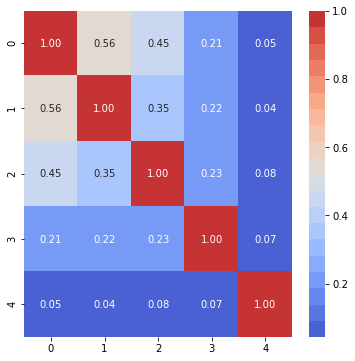

In [42]:
plt.figure(figsize = (6, 6))
sns.heatmap(item_similarity_df.iloc[0:5, 0:5].values, cmap = sns.color_palette("coolwarm", 20), annot = True, fmt = '.2f')
plt.show()

In [43]:
item_similarity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11200 entries, 1 to 34519
Columns: 11200 entries, 1 to 34519
dtypes: float64(11200)
memory usage: 957.1 MB


Now, we start with function `get_similar_anime` that gives us similarity score of the input anime in a sorted manner.

In [44]:
def get_similar_anime(an_id, user_rating):
    similar_score = item_similarity_df[an_id]*(user_rating - 5)
    similar_score = similar_score.sort_values(ascending = False)
    return similar_score

Also, we need function `Collaborative_recommendation` to get the sum of similarity scores based on input anime list.

In [45]:
def Collaborative_recommendation(ar):
    list_anime = []
    list_id = []
    for na, ra in ar: 
        x = anime[anime["name"] == na].anime_id
        list_id.append(int(x.iloc[0])) 
        b = [str(x.iloc[0]), ra]
        list_anime.append(b)
    similar_anime = pd.DataFrame()
    for anime_ID, ratings_New in list_anime:
        similar_anime = similar_anime.append(get_similar_anime(anime_ID, ratings_New), ignore_index = True)
    return (similar_anime.sum().sort_values(ascending = False).head(n = 20 + len(list_id)), list_id)

Finally, we are ready with Collaborative Filtering. We need to provide input anime list to get recommendations.

In [46]:
input_list = [["Death Note", 10], ["Fullmetal Alchemist", 9]]
new_df, list_id = Collaborative_recommendation(input_list)

So, `new_df` has anime_id and sum of similarity scores based on `input_list`. Let us look at `new_df`.

In [47]:
new_df.head()

1535    6.229695
121     5.537119
5114    3.260063
1575    3.225521
430     3.178206
dtype: float64

So, we gave input as "Death Note" with rating 10 and "Fullmetal Alchemist" with rating 9. 

Now, we just need to get recommendations from the above method.

In [48]:
final_df = pd.DataFrame()
for i in new_df.index:
    if i not in list_id:
        final_df = final_df.append(anime[anime["anime_id"] == i])
        
final_df

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
971,430,Fullmetal Alchemist: The Conqueror of Shamballa,"Comedy, Drama, Fantasy, Historical, Military, ...",Movie,1,7.74,186465
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
760,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
440,3588,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,8.08,580184
251,2025,Darker than Black: Kuro no Keiyakusha,"Action, Mystery, Sci-Fi, Super Power",TV,25,8.25,440334
1183,270,Hellsing,"Action, Horror, Seinen, Supernatural, Vampire",TV,13,7.64,308995
644,1818,Claymore,"Action, Adventure, Demons, Fantasy, Shounen, S...",TV,26,7.92,316853


So, we get anime recommendations that are very similar to the given input since the corresponding ratings were quite high.

Let us try to get new recommendations based on different input. But, this time we will put in an anime with a lower rating so we can get recommendations of opposite types of animes.

In [49]:
input_list = [["Gintama", 1]]
new_df, list_id = Collaborative_recommendation(input_list)
final_df = pd.DataFrame()
for i in new_df.index:
    if i not in list_id:
        final_df = final_df.append(anime[anime["anime_id"] == i])
final_df

,anime_id,name,genre,type,episodes,rating,members
2539,1891,YAT Anshin! Uchuu Ryokou,"Adventure, Comedy, Sci-Fi, Shounen",TV,50,7.24,887
2864,1207,Wata no Kuni Hoshi,"Drama, Fantasy, Psychological, Romance, Shoujo",Movie,1,7.15,1835
11328,24021,Sei Shoujo The Animation,Hentai,OVA,1,6.81,2159
2536,2429,Unico: Mahou no Shima e,"Adventure, Fantasy, Kids",Movie,1,7.24,1200
6388,1155,Melty Lancer,"Adventure, Comedy, Sci-Fi, Space",OVA,6,6.14,1035
3153,1892,YAT Anshin! Uchuu Ryokou 2,"Adventure, Comedy, Sci-Fi, Shounen",TV,25,7.07,486
4676,3185,Fortune Quest L,"Adventure, Comedy, Fantasy, Magic",TV,26,6.66,845
6834,3499,DinoZone,"Adventure, Sci-Fi, Shounen",OVA,5,5.90,636
6734,1154,Mother: Saigo no Shoujo Eve,"Adventure, Drama, Sci-Fi",Movie,1,5.97,697
4407,602,KO Seiki Beast Sanjuushi,"Adventure, Comedy, Fantasy, Mecha, Shounen, Su...",OVA,7,6.73,1194


So, clearly it can be seen that we get recommendations that are very different from input anime.

# Conclusion

In this notebook, we created recommendation systems using three methods:
* **Demographic Filtering**
* **Content Based Filtering**
* **Collaborative Filtering**

In *Demographic Filtering*, we have a very elementary recommendation system that provides recommendations based on the popularity and the wighted rating of the show.

In *Content Based Filtering*, we have a decent recommendation system that uses the genres of the input show, and tries to recommend shows with similar genre.

In *Collaborative Filtering*, we have a good recommendation system that considers the rating given by users and the similarity between user-user and show-show to get the recommendations based on the input list of animes and their corresponding ratings. 